In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# basic imports 
import numpy as np
import matplotlib.pyplot as plt

# Build dataset

In [2]:
from proj1_helpers import load_csv_data 
from outliers import handle_outliers
from standard import standardize

# load raw data
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

# handle outliers
X0, y = handle_outliers(input_data_raw, y_raw, -999, True)

# standardize
X0, mean_X0, std_X0 = standardize(X0)

# set y in {0,1} instead of {-1,1}
y[np.where(y==-1)]=0

samples with -999 are removed from the dataset 


In [3]:
# choose the features
ind_features = [1, 13, 4, 11, 7, 2, 16, 10, 19, 12, 23, 5, 8, 26, 21, 22, 0, 9]
X = X0[:, ind_features]
print(X.shape)

(68114, 18)


# Try fitting 
## fix gamma manually (check for convergence when the degre is low or high)

In [39]:
from build_poly import build_poly
from implementations import reg_logistic_regression

# model
arg_lr = dict()
arg_lr['method'] = 'lr'
arg_lr['loss'] = 'loglikelihood'
arg_lr['lambda_'] = 0

# build polynomial basis function
degree = 10
phi = build_poly(X, degree)

# optimization params
arg_lr['gamma'] = 1e-
arg_lr['method_minimization'] = 'gd' # 'gd' (gradient_descent) or 'newton'
arg_lr['initial_w'] = np.zeros(phi.shape[1])
arg_lr['max_iters'] = 10000
arg_lr['threshold'] = 100
arg_lr['debug_mode'] = 1

In [40]:
# logistic regression
w_tot, loss_tot = reg_logistic_regression(y, phi, arg_lr['initial_w'], arg_lr['max_iters'], arg_lr['gamma'], arg_lr['method_minimization'], arg_lr['lambda_'], arg_lr['threshold'], arg_lr['debug_mode'] )

KeyboardInterrupt: 

# Optimize degree

tested degree:  [1 2 3] 

------------------------------------------ cross validation with degree =  1


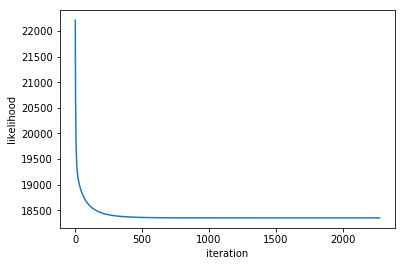

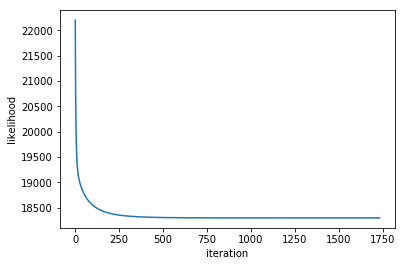

------------------------------------------ cross validation with degree =  2


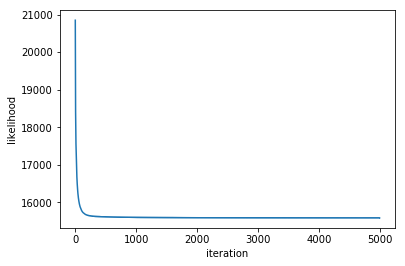

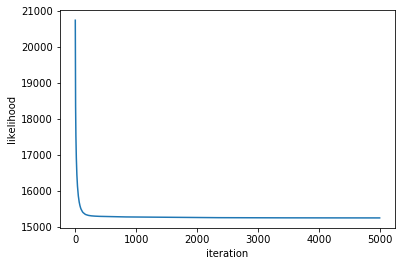

------------------------------------------ cross validation with degree =  3


D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1\code\COMMON\costs.py:43: RuntimeWarning: overflow encountered in exp
  loglikelihood = np.sum(np.log(1+np.exp(tx.dot(w))) - y*(tx.dot(w))) + lambda_*w.T.dot(w)
D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1\code\COMMON\sigmoid.py:6: RuntimeWarning: overflow encountered in exp
  return np.exp(z)/(np.exp(z)+1)
D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1\code\COMMON\sigmoid.py:6: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(z)/(np.exp(z)+1)


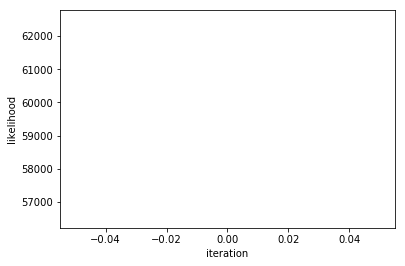

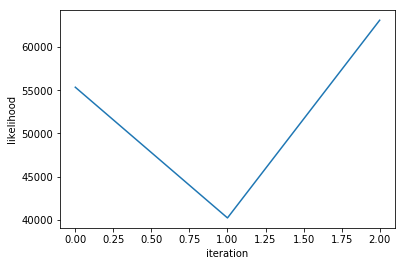

Optimal degree:  2
Associated testing loss:  15516.117769 



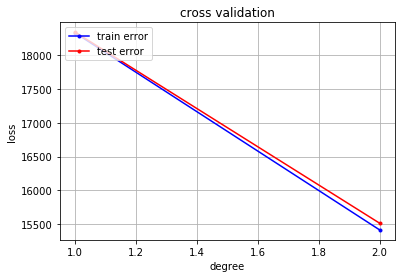

In [23]:
from optimize_hyperparams import optimize_degree

# parameters
arg_lr['k_fold'] = 2
degree_min = 3 
degree_max = 10
degree_steps = 2

# optimization
w_opt, loss_tr, loss_te, degree_opt = optimize_degree(y, X, degree_min, degree_max, degree_steps, arg_lr, debug_mode=1)